<a href="https://colab.research.google.com/github/pawanshaw66/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
# Data preprocessing
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importing the datasets
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Churn_Modelling.csv')
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]


In [ ]:
# create dummy variables
geography = pd.get_dummies(x["Geography"],drop_first=True)
gender = pd.get_dummies(x["Gender"],drop_first=True)
print(geography)
print(gender)
x = pd.concat([x,geography,gender],axis=1)
print(x)


      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771 

In [ ]:
x = x.drop(['Geography','Gender'],axis=1)
print(x)


      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1   

In [ ]:
# spliting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [ ]:
# now lets make the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense      # for hidden layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 7s 9ms/step - loss: 0.5511 - accuracy: 0.7958 - val_loss: 0.5089 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 7ms/step - loss: 0.5021 - accuracy: 0.7958 - val_loss: 0.4952 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4916 - accuracy: 0.7958 - val_loss: 0.4854 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4799 - accuracy: 0.7958 - val_loss: 0.4726 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 6ms/step - loss: 0.4648 - accuracy: 0.7958 - val_loss: 0.4579 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7958 - val_loss: 0.4449 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4375 - accuracy: 0.7994 - val_loss: 0.4366 - val_accuracy: 0.8019

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[0.27727264],
       [0.3335963 ],
       [0.13897063],
       ...,
       [0.06628876],
       [0.11224195],
       [0.20199242]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

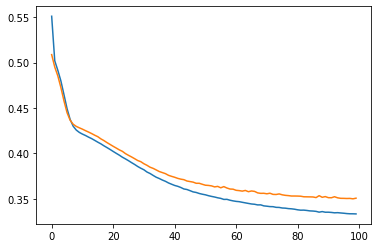

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

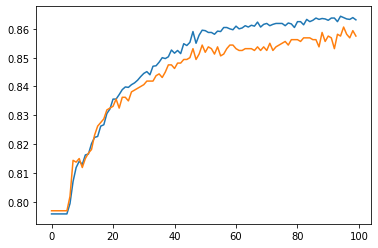

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])